In [1]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()


### 3.4 Dimensionality Reduction, Feature Extraction and Manifold Learning
- Principal Component Analysis (PCA)
  - 가장 간단하고 흔히 사용하는 대표적인 기법
- Non-negative matrix factorization (NMF)
  - 특성 추출에 널리 사용
- t-distributed stochastic neighbor embedding (t-SNE)
  - 2차원 산점도를 이용해 시각화 용도로 많이 활용

#### 3.4.1 Principal Component Analysis (PCA)

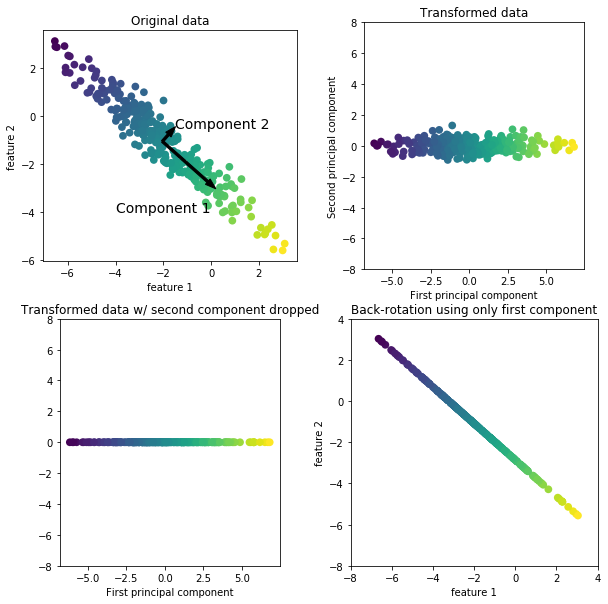

In [2]:
mglearn.plots.plot_pca_illustration()

##### Applying PCA to the cancer dataset for visualization
- 유방함 데이터의 특성값의 개수는 30개
- 30개의 특성들에 대한 산점도 그래프를 그리면 총 435개의 산점도가 산출됨
- 보다 더 쉽게 특성 데이터들을 시각화 하는 방법은 악성(Malignant)와 양성(Benign)에 대해 30개의 특성의 히스토그램을 그리는 것 

cancer.data.shape: (569, 30)


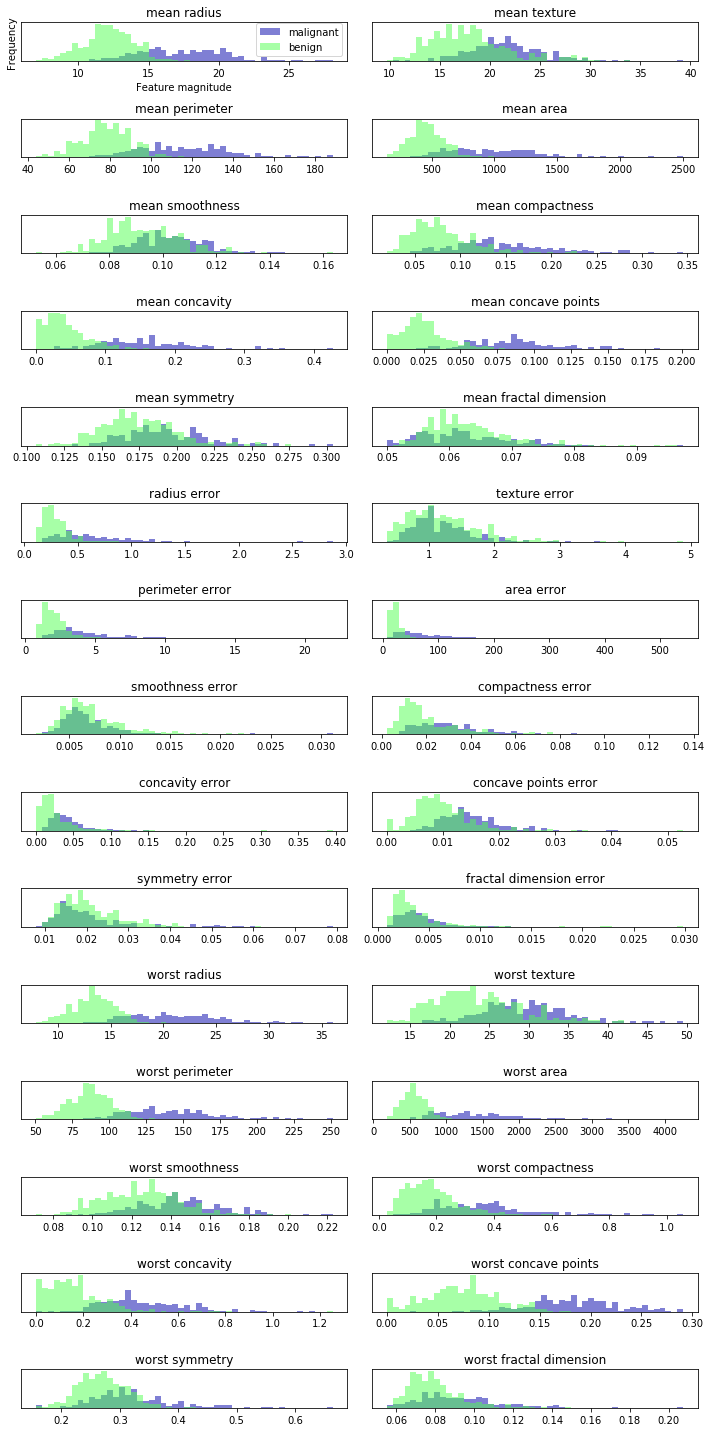

In [3]:
print("cancer.data.shape: {}".format(cancer.data.shape))

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

- 위 그래프에서 다음 두 개의 특성 주목
  - smoothness error: 두 히스토그램이 겹쳐서 별로 쓸모 없는 특성임
  - worst concave points: 두 히스토그램이 확실이 구분되어 매우 유용한 특성임

- PCA 적용전에 StandardScaler를 사용하여 각 특성의 분산이 1이 되도록 스케일링

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
scaler = StandardScaler()

scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)
print("X_scaled.shape: {}".format(X_scaled.shape))

X_scaled.shape: (569, 30)


- n_components: 차원 축소의 결과로 남게될 차원의 개수

In [5]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0,0.5,'Second principal component')

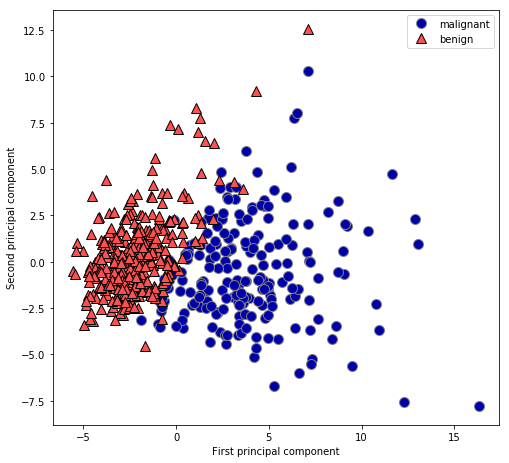

In [6]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

- 산출된 주성분은 원본 데이터에 있는 해당 주성분 방향에 대응하는 여러 특성이 조합된 형태
- components_  변수
  - 주성분의 구성 모습이 담겨 있음

In [7]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


In [8]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.219  0.104  0.228  0.221  0.143  0.239  0.258  0.261  0.138  0.064
   0.206  0.017  0.211  0.203  0.015  0.17   0.154  0.183  0.042  0.103
   0.228  0.104  0.237  0.225  0.128  0.21   0.229  0.251  0.123  0.132]
 [-0.234 -0.06  -0.215 -0.231  0.186  0.152  0.06  -0.035  0.19   0.367
  -0.106  0.09  -0.089 -0.152  0.204  0.233  0.197  0.13   0.184  0.28
  -0.22  -0.045 -0.2   -0.219  0.172  0.144  0.098 -0.008  0.142  0.275]]


Text(0,0.5,'Principal components')

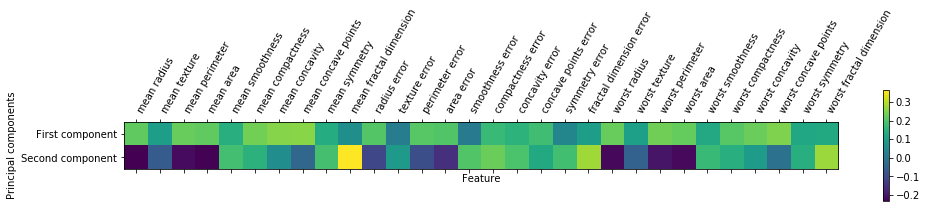

In [9]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

- PCA이후의 분류 정확도 변화

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier

cancer = load_breast_cancer()
scaler = StandardScaler()

scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)
print("X_scaled.shape: {}".format(X_scaled.shape))

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    cancer.target, 
    stratify=cancer.target, 
    random_state=66
)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

X_scaled.shape: (569, 30)
Accuracy on training set: 1.000
Accuracy on test set: 0.958


In [11]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
scaler = StandardScaler()

scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("X_pca.shape: {}".format(X_pca.shape))

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, 
    cancer.target, 
    stratify=cancer.target, 
    random_state=66
)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

X_pca.shape: (569, 2)
Accuracy on training set: 1.000
Accuracy on test set: 0.944


- explained_variance_ratio
  - Percentage of variance explained by each of the selected components.
  - 주성분들을 활용하여 원본 데이터에 대하여 설명할 수 있는 분산의 정도
  - 자동으로 주성분 개수가 결정

7
[0.443 0.19  0.094 0.066 0.055 0.04  0.023]
0.910095300696731


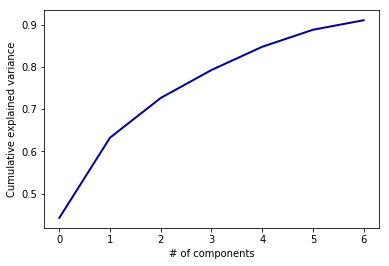

In [12]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
scaler = StandardScaler()

scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

pca = PCA(n_components=0.90)
pca.fit(X_scaled)

print(pca.n_components_)
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [13]:
# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("X_pca.shape: {}".format(X_pca.shape))

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, 
    cancer.target, 
    stratify=cancer.target, 
    random_state=66
)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

X_pca.shape: (569, 7)
Accuracy on training set: 1.000
Accuracy on test set: 0.951


##### Eigenfaces for feature extraction
- PCA를 사용한 특성 추출
  - 원본 데이터 표현보다 분석하기에 더 적합한 데이터 표현을 찾을 수 있으리라는 생각에서 출발<br/><br/>

- 얼굴 이미지에서 주요 특성 추출하는 응용 제작
  - LFW (Labled Faces in the Wild) 데이터셋 활용
    - 인터넷에서 Crawling한 유명 인사(2000년 초반 이후의 정치인, 가수, 배우, 운동선수)들의 얼굴 이미지
    - 처리 속도를 높이기 위해 흑백 이미지를 사용하고 스케일을 줄임
      - fetch_lfw_people 함수 사용
      - 인자
        - color=False (기본값)
          - color가 True이면 3 RGB channels 값 유지          
        - resize=0.5 (기본값)
        - min_faces_per_person=None (기본값)
          - 각 사람 얼굴당 최소한의 이미지 개수를 지정
    - 출처: 메사추세츠 애머스트 주립대학의 Vision Lab (http://vis-www.cs.umass.edu/lfw/)

In [14]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

print("people.images.shape: {}".format(people.images.shape))
print("An image shape: {}".format(people.images[0].shape))
print("Number of classes: {}".format(len(people.target_names)))
print()
print("people.data.shape: {}".format(people.data.shape))
print("people.target.shape: {}".format(people.target.shape))
print()
print("people.target[0]: {}".format(people.target[0]))
print("people.target_names[0]: {}".format(people.target_names[0]))

people.images.shape: (3023, 87, 65)
An image shape: (87, 65)
Number of classes: 62

people.data.shape: (3023, 5655)
people.target.shape: (3023,)

people.target[0]: 61
people.target_names[0]: Alejandro Toledo


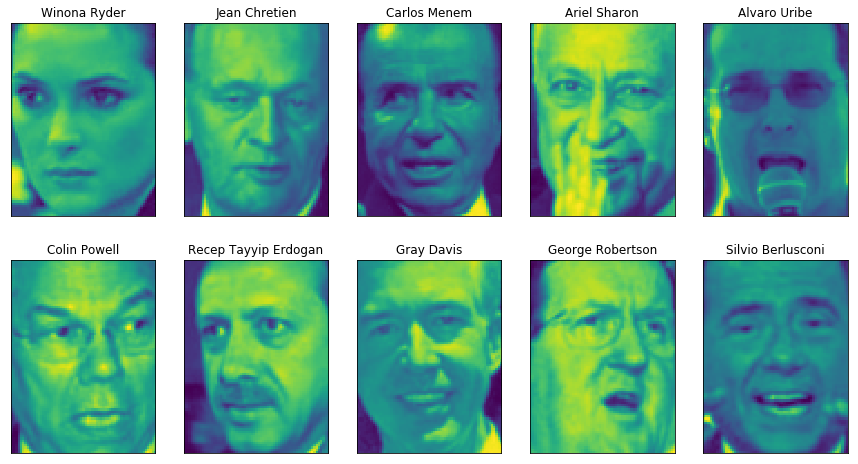

In [15]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [16]:
# count how often each target appears
counts = np.bincount(people.target)
print(counts)
print()
# print counts next to target names:
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("[{0:2}] {1:23} {2:3}".format(i, name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

[ 39  35  21  36  20  77  42  24  29  21 236  31 121  22 530 109  44  26
  30  22  39  71  20  28  52  55  21  42  21  24  20  53  31  23  28  60
  32  41  22  41  48  29  33  20  22  37  20  22  30  27  32  26  23  52
  33  23  25  33 144  32  49  24]

[ 0] Alejandro Toledo         39   [ 1] Alvaro Uribe             35   [ 2] Amelie Mauresmo          21   
[ 3] Andre Agassi             36   [ 4] Angelina Jolie           20   [ 5] Ariel Sharon             77   
[ 6] Arnold Schwarzenegger    42   [ 7] Atal Bihari Vajpayee     24   [ 8] Bill Clinton             29   
[ 9] Carlos Menem             21   [10] Colin Powell            236   [11] David Beckham            31   
[12] Donald Rumsfeld         121   [13] George Robertson         22   [14] George W Bush           530   
[15] Gerhard Schroeder       109   [16] Gloria Macapagal Arroyo  44   [17] Gray Davis               26   
[18] Guillermo Coria          30   [19] Hamid Karzai             22   [20] Hans Blix                39   
[21]

- 데이터 집합의 편중을 없에기 위해 사람마다 최대 50개의 이미지만 선택

In [17]:
print("people.target.shape:", people.target.shape)
print()
mask = np.zeros(people.target.shape, dtype=np.bool)

print("mask.shape:", mask.shape)
print()

print("np.unique(people.target):\n{0}".format(np.unique(people.target)))
print()

for target in np.unique(people.target):
    print("np.where(people.target == {0}):\n{1}".format(target, np.where(people.target == target)))
    mask[np.where(people.target == target)[0][:50]] = 1
    print()
    
X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 값을 0~1 사이의 값으로 변환 --> 그레이 스케일로 변환
X_people = X_people / 255.

people.target.shape: (3023,)

mask.shape: (3023,)

np.unique(people.target):
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61]

np.where(people.target == 0):
(array([  58,   72,   90,  314,  494,  496,  598,  650,  960, 1078, 1212,
       1243, 1265, 1356, 1497, 1586, 1622, 1793, 1803, 1816, 1881, 1952,
       1962, 2003, 2068, 2179, 2183, 2239, 2373, 2441, 2510, 2535, 2622,
       2649, 2651, 2697, 2819, 2960, 2998]),)

np.where(people.target == 1):
(array([   4,   17,   41,   87,  142,  216,  333,  413,  417,  508,  857,
        876,  940,  944,  949, 1165, 1307, 1505, 1529, 1539, 1729, 1807,
       1837, 1933, 2211, 2243, 2254, 2269, 2285, 2290, 2360, 2387, 2616,
       2636, 2926]),)

np.where(people.target == 2):
(array([  65,  188,  266,  509,  912, 1055, 1102, 1353, 1379, 1468, 1868,
       1924, 2073, 2115, 2180, 2272, 2344, 2412, 2444, 249

In [18]:
print("X_people.shape:", X_people.shape)
print("y_people.shape:", y_people.shape)

X_people.shape: (2063, 5655)
y_people.shape: (2063,)


- 얼굴 분류 문제의 어려운점
  - 대표적인 Supervised Learning
  - 일반적으로 얼굴 데이터베이스에는 사람의 수는 매우 많지만 각 사람에 대한 이미지 수는 적음 (즉, 클래스별 훈련 데이터가 작음)
  - 대규모 모델을 처음부터 다시 훈련시키지 않고도 새로운 사람의 얼굴을 쉽게 추가하여 모델을 강화시킬 수 있어야 함
- KNeighborsClassifier
  - 위와 같은 문제가 존재할 때 가장 쉽게 사용할 수 있는 모델
  - n_neighbors=1
    - 클래스마다 하나의 최근접 훈련 샘플만 사용

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# split the data in training and test set
# stratify parameter makes a split so that the proportion of values in the sample produced 
# will be the same as the proportion of values provided to parameter stratify.
# train_test_split은 훈련 데이터와 테스트 데이터를 기본적으로 75%:25%로 나눔

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
print("X_train.shape: {}".format(X_train.shape))
print("y_train.shape: {}".format(y_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("y_test.shape: {}".format(y_test.shape))

# build a KNeighborsClassifier with using one neighbor:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

X_train.shape: (1547, 5655)
y_train.shape: (1547,)
X_test.shape: (516, 5655)
y_test.shape: (516,)
Test set score of 1-nn: 0.23


- 0.23의 분류 정확도
  - 나쁜 결과는 아님
    - 무작위 분류 정확도는 1/62 = 1.6%
  - 좋은 결과도 아님
    - 두 이미지의 동일 위치 픽셀의 거리 비교 기반 --> 실제적으로 얼굴이미지를 인식하는 것과 다름
    - 동일한 두 사람 얼굴에 대해 얼굴위치가 한 픽셀만 오른쪽으로 이동해도 전혀 다른 얼굴 이미지로 인식 

- PCA with Whitening (백색화)
  - 인자: whiten=True
    - 각 주성분마다 특성값들의 스케일을 동일하게 함
    - 즉, PCA 변환 결과 각 주성분 마다 데이터 특성들이 평균이 0, 표준편차가 1이 되도록 변환
  - 일반적인 PCA 결과 데이터에 대하여 StandardScaler 적용하는 것과 동일한 효과

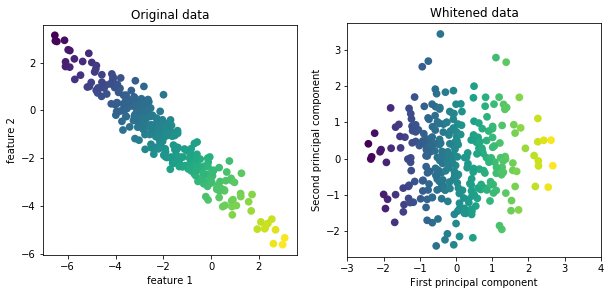

In [20]:
mglearn.plots.plot_pca_whitening()

- PCA를 이용하여 처음 원본 데이터의 5655개의 특성 종류에서 100개의 주성분을 추출 (pca.components_)
- 추출한 주성분을 활용하여 원본 데이터를 변환 
    - 주성분 행렬(100, 5655) X 원본 샘플(5655,) = 새로운 특성데이터(100,)

In [21]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


In [22]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.31


- PCA 모델을 활용하여 변환한 데이터를 사용한 예측 정확도가 0.23 에서 0.31로 향상됨

In [23]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


- 하지만, 활용하는 분류 모델에 따라 PCA를 활용한 예측 정확도는 달라짐
- 일반적으로 PCA로 변환된 더 낮은 차원의 데이터를 활용하면 예측 정확도는 다소 낮아짐

In [24]:
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(random_state=0)
lr1.fit(X_train, y_train)
print("Accuracy on test set: {:.2f}".format(lr1.score(X_test, y_test)))

lr2 = LogisticRegression(random_state=0)
lr2.fit(X_train_pca, y_train)

print("Accuracy on test set: {:.3f}".format(lr2.score(X_test_pca, y_test)))

Accuracy on test set: 0.53
Accuracy on test set: 0.496


- 이미지인 경우 주성분 시각화 가능

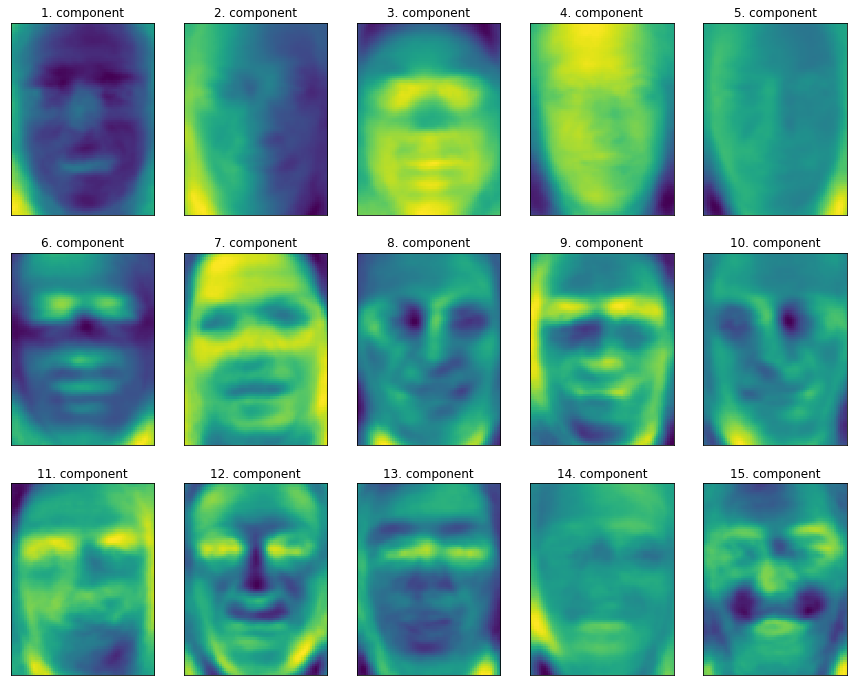

In [25]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

- 주성분 1: 얼굴과 배경의 명암 차이를 기록한 것으로 추정
- 주성분 2: 오른쪽과 왼쪽의 명암 차이를 담고 있는 것으로 추정
- ...

- 주성분을 사용하여 원본 데이터를 재구성
  - 주성분 행렬(100, 5655) X 원본 샘플(5655,) = 새로운 특성데이터(100,)
  - 주성분의 전치행렬(5666, 100) X 새로운 특성데이터(100,) = 원본 샘플(5666,)


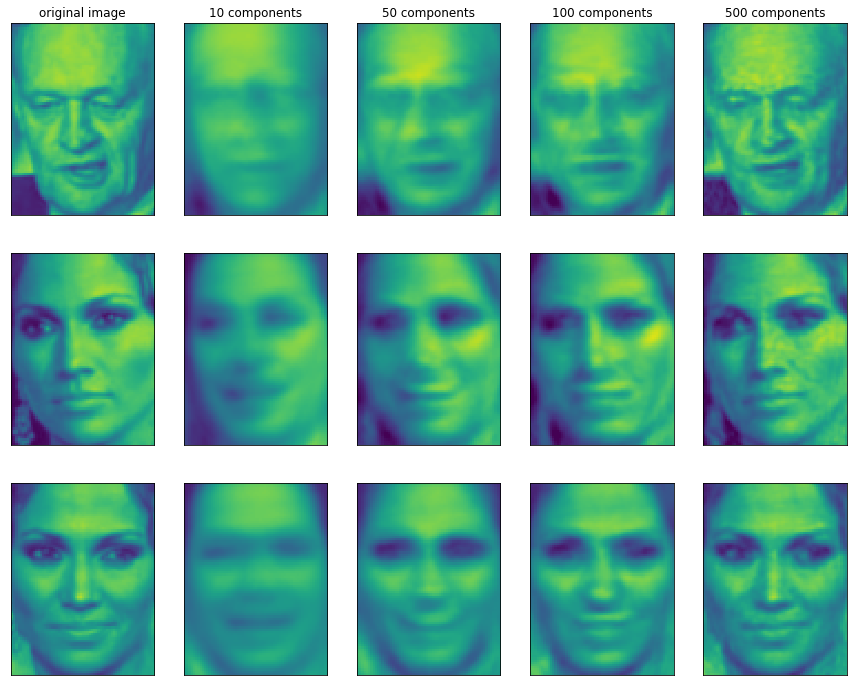

In [26]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0,0.5,'Second principal component')

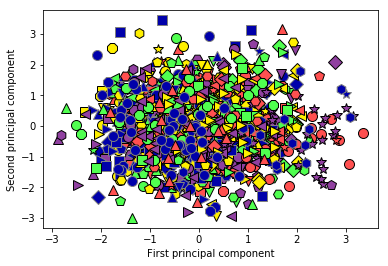

In [27]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

#### 3.4.2 Non-Negative Matrix Factorization (NMF)
![Alt text](http://cfile24.uf.tistory.com/image/990F9B405A3923AF21FB8F)

- NMF
  - It is a group of algorithms where a matrix V is factorized into two matrices W and H, with the property that all three matrices have no negative elements. This non-negativity makes the resulting matrices easier to inspect. Also, in applications such as processing of audio spectrograms or muscular activity, non-negativity is inherent to the data being considered. Since the problem is not exactly solvable in general, it is commonly approximated numerically.
  - 0 또는 양수로만 구성된 W와 H만을 생성
  - W와 H의 각 원소가 음수가 아니므로 원 데이터의 특성에 음수가 없어야 함.
  - https://en.wikipedia.org/wiki/Non-negative_matrix_factorization
- NMF 활용 데이터
  - 음성/악기 오디오 데이터
  - 여러 악기 또는 음성이 섞여 있는 데이터에서 각 원본 성분들을 구분할 수 있음
- PCA vs. NMF
  - PCA
    - 음수 성분이나 계수가 만드는 효과의 이해가 어려움. 
    - 실제로 부호에는 아무런 규칙이 없음
  - NMF
    - 상대적으로 PCA보다 해석하기 쉬움.
    - 모든 주성분 사이에 원본 데이터의 특질을 더 많이 포함하는 중요도 차이가 없음 --> 즉 모든 주성분은 동등하게 중요
    - W와 H의 무작위 초기화 --> 난수 생성 초기값에 따라 결과가 달라짐

##### Applying NMF to synthetic data
- 원본 데이터 확인
  - 원본 데이터의 각 성분이 양수인지 확인하는 작업 필요
  - 각 데이터가 원점 (0,0)에서 상대적으로 어디에 놓여 있는가가 중요.
  - 즉, 원점 (0,0)에서 데이터가 가는 방향을 추출한 것으로 음수미포함 성분을 이해 가능<br/><br/>  

- NMF 알고리즘
  - $V$: 원본 데이터 행렬
  - $W$: 새롭게 변환된 행렬
  - $H$: 주성분 행렬
  - the approximation of $V$ by $V \simeq WH$ is achieved by minimizing the error function $$\min_{W,H}|| V-WH ||_{F},~subject~to~W\geq 0, H\geq 0$$.
  - 아래 논문을 활용하여 위와 같은 최적화 문제 해결
    - Daniel D. Lee & H. Sebastian Seung (2001). Algorithms for Non-negative Matrix Factorization (PDF). Advances in Neural Information Processing Systems 13: Proceedings of the 2000 Conference. MIT Press. pp. 556–562.
    - ![image.png](attachment:image.png)

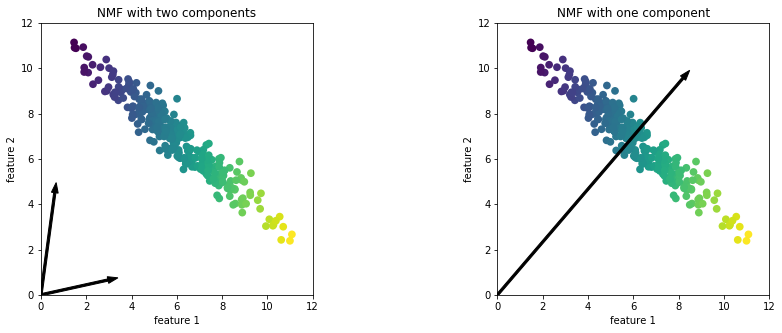

In [30]:
mglearn.plots.plot_nmf_illustration()

- 첫번째 그래프
  - 주성분 2개
    - 데이터의 각 특성마다 끝에 위치한 포인트를 가리키는 방향으로 주성분 구성
    - 총 100개의 원본 데이터: Shape (100, 2)에 대한 행렬 분해 결과
      - V (100 x 2) = W (100 x 2) x H (2 x 2)
  - 새롭게 변환된 특성 데이터: W (100 x 2)
- 두번째 그래프
  - 주성분 1개
    - 데이터를 가장 잘 표현하는 각 특성마다 평균값으로 향하는 주성분을 구성
    - 총 100개의 원본 데이터: Shape (100, 2)에 대한 행렬 분해 결과
      - V (100 x 2) = W (100 x 1) x H (1 x 2)
  - 새롭게 변환된 특성 데이터: W (100 x 1)

##### Applying NMF to face images

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
______________________________________________________nmf_faces - 396.8s, 6.6min


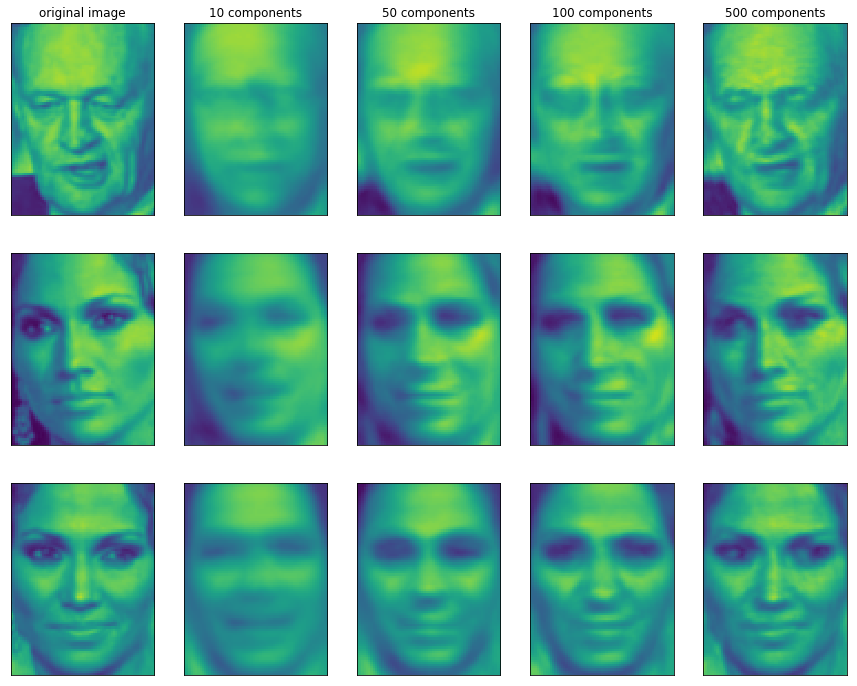

In [29]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

- 훈련 데이터에 대한 비음수 분해: V = WH
  - 원본 훈련 데이터 1,482개 V: Shape - (1486, 5655)
  - 새롭게 변환된 행렬 W: Shape - (1486, 15)
  - 주성분 데이터 H: Shape - (15, 5655)
<br/>
- 테스트 데이터에 대한 비음수 분해: V=WH
  - 원본 테스트 데이터 494개 V: Shape - (494, 5655)
  - 새롭게 변환된 행렬 W: Shape - (494, 15)
  - 주성분 데이터 H: Shape - (15, 5655)
<br/>  
- [주의] 훈련 데이터에 대한 Fit 이후 테스트 데이터에 대한 Transform
  - NMF는 Fit에 대한 의미없음
    - https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/decomposition/nmf.py#L1246
  - Transform 이 호출될 때 주어진 데이터에 대한 NMF 분해 시작하여 Transform의 반환값으로 W를 반환함.

Transformed Train Data Shape: (1547, 15)
Transformed Test Data Shape: (516, 15)


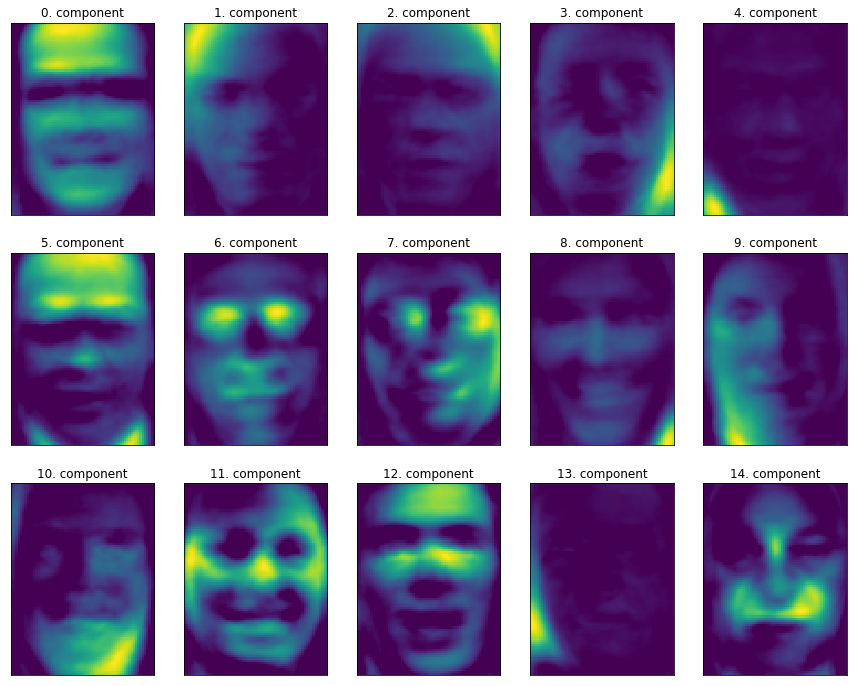

In [31]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

print("Transformed Train Data Shape:", X_train_nmf.shape)
print("Transformed Test Data Shape:", X_test_nmf.shape)

fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

- 주성분 0~14 중 하나를 선택 --> compn 변수에 할당
- NMF 알고리즘에 의하여 변환된 훈련 데이터: W (1486, 15)
- 변환된 훈련 데이터의 각 특성중 compn 위치 값이 가장 큰 10개 선택하여 해당 10개에 대한 원본 데이터를 이미지 형태로 출력

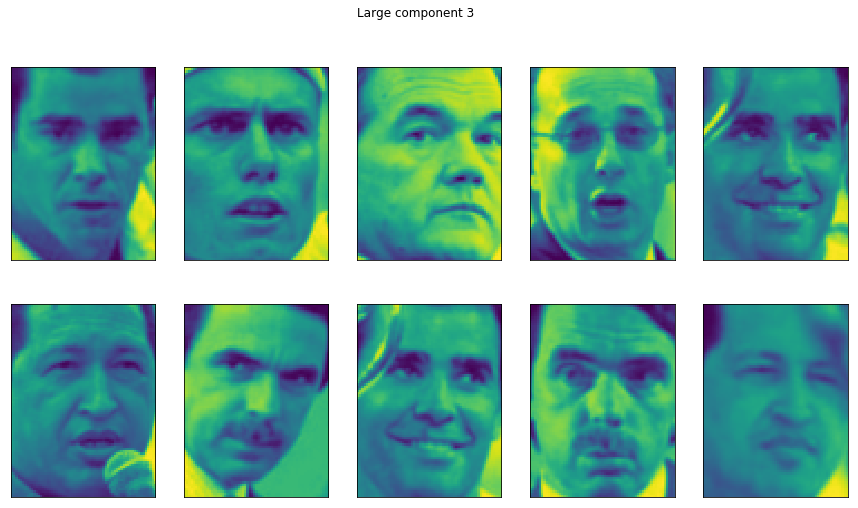

In [32]:
compn = 3
# sort by 3rd component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Large component 3")
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

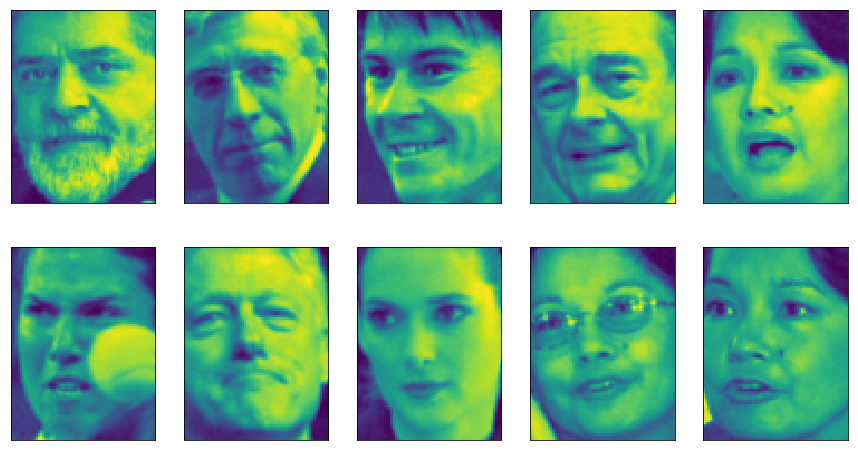

In [33]:
compn = 7
# sort by 7th component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig.suptitle("Large component 7")
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

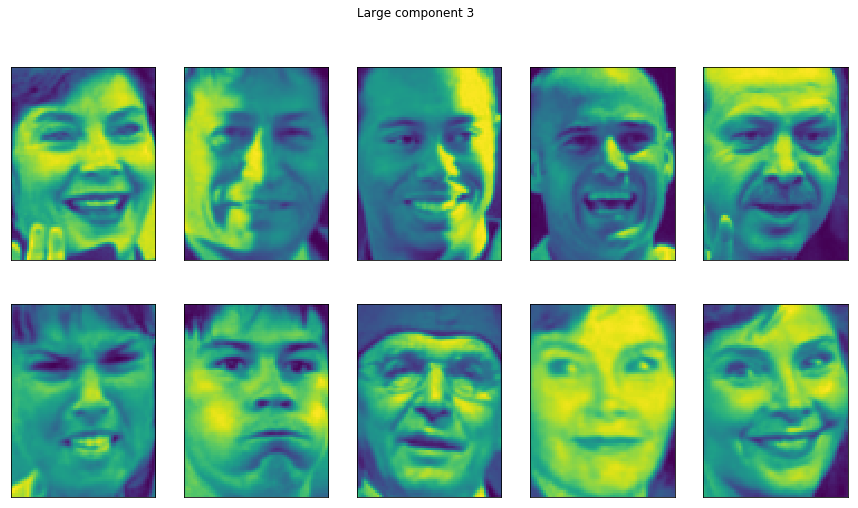

In [34]:
compn = 11
# sort by 3rd component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Large component 3")
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

Shape of S: (2000, 3)
2.6540820277281183
2.489088868975839
1.0775743294863065



Text(0,0.5,'Signal')

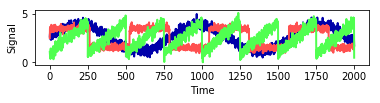

In [35]:
S = mglearn.datasets.make_signals()
print("Shape of S: {}".format(S.shape))
print(S[0][0])
print(S[0][1])
print(S[0][2])
print()

plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

Shape of S: (2000, 3)
Shape of A: (100, 3)
0.5488135039273248
0.7151893663724195
0.6027633760716439

0.5448831829968969
0.4236547993389047
0.6458941130666561

Shape of X (=S * A.T): (2000, 100)


Text(0,0.5,'Measurements')

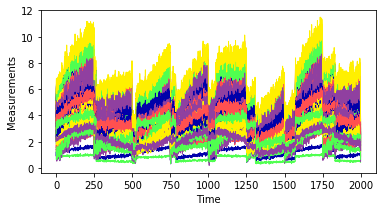

In [36]:
print("Shape of S: {}".format(S.shape))

# Mix data into a 100 dimensional state
A = np.random.RandomState(0).uniform(size=(100, 3))
print("Shape of A: {}".format(A.shape))
print(A[0][0])
print(A[0][1])
print(A[0][2])
print()
print(A[1][0])
print(A[1][1])
print(A[1][2])
print()

X = np.dot(S, A.T)
print("Shape of X (=S * A.T): {}".format(X.shape))

plt.figure(figsize=(6, 3))
plt.plot(X, '-', linewidth=1.0)
plt.xlabel("Time")
plt.ylabel("Measurements")

In [37]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("NMF - Recovered signal shape: {}".format(S_.shape))

NMF - Recovered signal shape: (2000, 3)


In [38]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)
print("PCA - Recovered signal shape: {}".format(H.shape))

PCA - Recovered signal shape: (2000, 3)


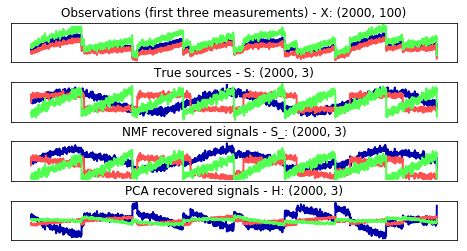

In [39]:
models = [X, S, S_, H]
names = ['Observations (first three measurements) - X: (2000, 100)',
         'True sources - S: (2000, 3)',
         'NMF recovered signals - S_: (2000, 3)',
         'PCA recovered signals - H: (2000, 3)']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5}, subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

#### 3.4.3 Manifold Learning with t-SNE
- Manifold (다양체)
  - In mathematics, a manifold is a topological space that locally resembles Euclidean space near each point.
  - 국소적으로 유클리드 공간과 닮은 위상 공간
  - http://www.hani.co.kr/arti/science/science_general/294895.html<br/><br/>
  
- Manifold Learning $\sim$ Nonlinear dimensionality reduction
  - 시각화가 주 목적
  - 주성분으로 2개 (또는 3개)만 주로 산출
    - 기존 원본 데이터 포인트 사이의 거리를 가장 잘 보존하는 2차원 표현을 찾는 것
  - 대표적인 알고리즘: t-SNE (Stochastic Neighbor Embedding)
    - 1) 각 원본 데이터를 2차원 공간에 무작위로 표현
    - 2) 원본 특성 공간에서 가까운 포인트는 보다 가깝게, 멀리 떨어진 포인트는 보다 멀어지게 만듦
    - 3) 멀리 떨어진 포인트들간의 거리를 보존하는 것보다 가까이 있는 포인트에 더 많은 비중을 둠.
    - 참고: https://ratsgo.github.io/machine%20learning/2017/04/28/tSNE/
  - 탐색적 데이터 분석에 활용

- scikit-learn의 손글씨 데이터셋
  - 1797개의 8x8 흑백 숫자 이미지

digits.data.shape: (1797, 64)


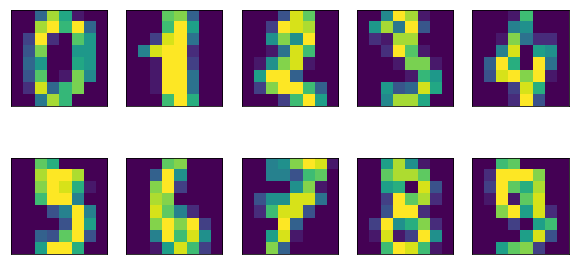

In [40]:
from sklearn.datasets import load_digits
digits = load_digits()
print("digits.data.shape: {0}".format(digits.data.shape))

fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

In [41]:
# build a PCA model
pca = PCA(n_components=2)
pca.fit(digits.data)
# transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)

Text(0,0.5,'Second principal component')

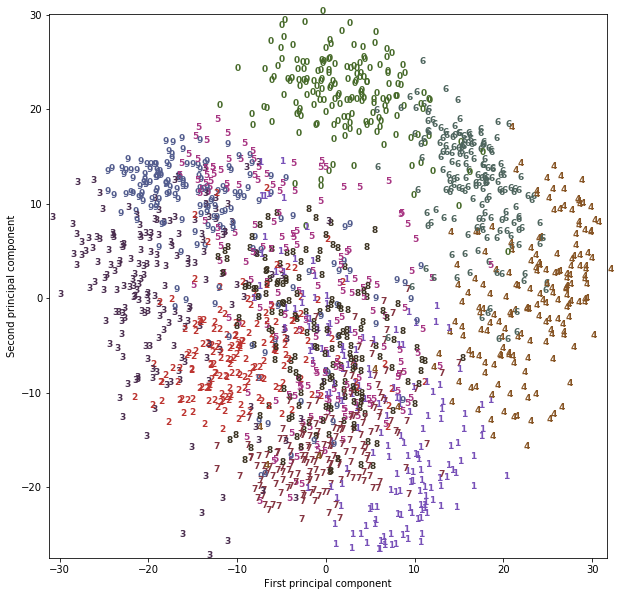

In [42]:
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_pca[i, 0], digits_pca[i, 1], 
             str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [43]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
digits_tsne = tsne.fit_transform(digits.data)

Text(0.5,0,'t-SNE feature 1')

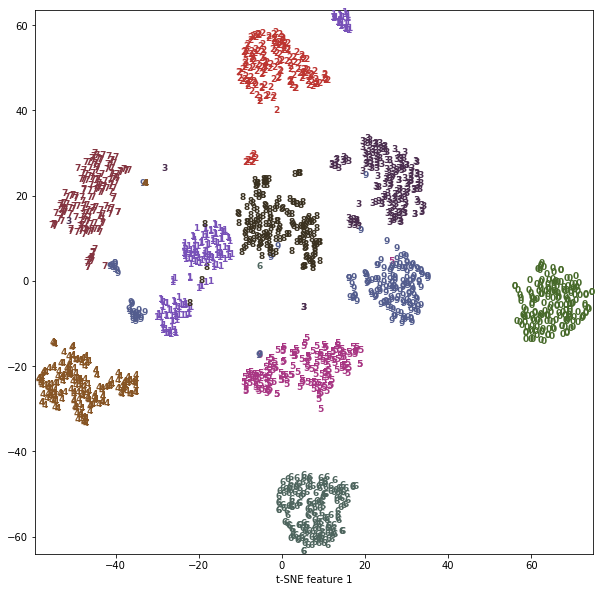

In [44]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], 
             str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")

- cancer 데이터에 대한 TSNE

In [45]:
cancer = load_breast_cancer()

cancer_tsne = TSNE(random_state=42)
cancer_data_tsne = tsne.fit_transform(cancer.data)

Text(0.5,0,'t-SNE feature 1')

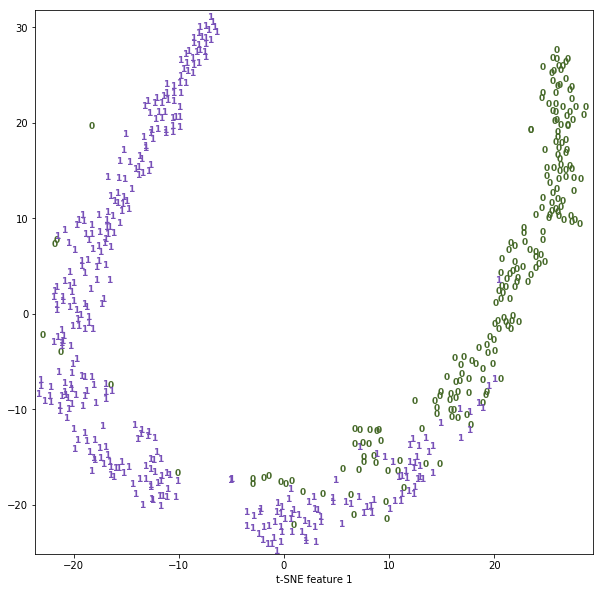

In [46]:
plt.figure(figsize=(10, 10))
plt.xlim(cancer_data_tsne[:, 0].min(), cancer_data_tsne[:, 0].max() + 1)
plt.ylim(cancer_data_tsne[:, 1].min(), cancer_data_tsne[:, 1].max() + 1)
for i in range(len(cancer.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(cancer_data_tsne[i, 0], cancer_data_tsne[i, 1], 
             str(cancer.target[i]),
             color = colors[cancer.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")